### Simple Classification

One of the obivious thing is try a simple classification and check if its works or not. Let's try a very simple machine learning models NB to see how much it works

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from utils import Dataset, Preprocessing
from models import Models
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

models = Models()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zaheerbabar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Get the labelled dataset 

In [2]:
data_obj = Dataset() 

# get labelled data
train_df = data_obj.get_labelled_data()
train_df

,phrase,label
0,wanneer is de iphone 14 er,M_ASSORTIMENT_BESCHIKBAARHEID
1,wanneer is de iphone 14 beschikbaar,M_ASSORTIMENT_BESCHIKBAARHEID
2,wanneer komt de iphone 14 uit,M_ASSORTIMENT_BESCHIKBAARHEID
3,samsung door jullie ook verkocht,M_ASSORTIMENT_BESCHIKBAARHEID
4,hebben jullie de google pixel ook,M_ASSORTIMENT_BESCHIKBAARHEID
...,...,...
1520,ik moet voor eerste factuur 38.5 euro 41 euro ...,MT_FACTUUR_EERSTE
1521,abonnement van 10 per maand en op de eerste fa...,MT_FACTUUR_EERSTE
1522,ook internet voor thuis bestelde wanneer is he...,MT_FACTUUR_EERSTE
1523,na verlebging van abonnement was eerste factuu...,MT_FACTUUR_EERSTE


Apply proprocessing (cleaning using Dutch spaCy model, doing label encoding, and then converting the text in Document term frequencey matrix)

In [3]:
# get preporcessing object
process_obj = Preprocessing()

# get the data preprocessed
cleaned_train_df = process_obj.get_preprocessd_data(train_df, text_column="phrase", has_labels = True)

# get Document Term frequence matrix
X, y = process_obj.get_DTM(cleaned_train_df)
### could add feature selection here
X.shape

(1525, 581)

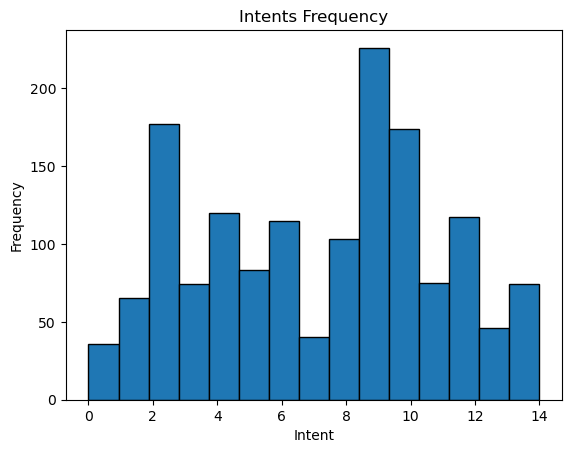

In [4]:
# Create histogram
plt.hist(y, bins=15, edgecolor='black')

# Add titles and labels
plt.title('Intents Frequency')
plt.xlabel('Intent')
plt.ylabel('Frequency')

# Show plot
plt.show()

Use a simple machine learning models like Naive Bayes

In [5]:

# Initialize the classifier
clf = models.get_simple_Classifier()

Apply cross validation using Stratified sampling to make sure we getting equal representation of the each class in training data.

In [6]:
SKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scores = []
for train_index, val_index in SKF.split(X, y):
    x_train_fold, x_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    clf.fit(x_train_fold, y_train_fold)
    scores.append(clf.score(x_val_fold, y_val_fold))
# Perform 10-fold cross-validation
# scores = cross_val_score(clf, X, y, cv=10)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")


Cross-validation scores: [0.8366013071895425, 0.8300653594771242, 0.8300653594771242, 0.8627450980392157, 0.8562091503267973, 0.8618421052631579, 0.881578947368421, 0.8618421052631579, 0.8223684210526315, 0.8421052631578947]
Mean accuracy: 0.8485423116615067


Now apply the apply over the unlablled dataset

In [7]:
# get unlabelled data
test_df = data_obj.get_unlabelled_data()

cleaned_test_df = process_obj.get_preprocessd_data(test_df, text_column="user_msg", has_labels = False)


X_test = process_obj.get_DTM(cleaned_test_df, has_labels = False)


In [8]:
test_y = clf.predict(X_test)

In [9]:
test_labels = process_obj.label_decoder(test_y)
len(np.unique(test_labels))

# new_test_df = pd.DataFrame({
#     'user_msg': test_df['user_msg'],
#     'label': test_labels
# })

# new_test_df.to_csv('./data/unlablled_labeled.csv', index=False)

14

### Neural Network based classification

Now lets apply a simple neural work to classify the text (using bag-of-words rather a sequence)

In [10]:
import tensorflow as tf

In [11]:
phrases = cleaned_train_df['phrase'].values
labels = cleaned_train_df['class'].values

In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True, oov_token='<OOV>')
tokenizer.fit_on_texts(phrases)
sequences = tokenizer.texts_to_sequences(phrases)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=20, padding='post')

15
15
Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1199 - loss: 2.6753 - val_accuracy: 0.1485 - val_loss: 2.5610
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1613 - loss: 2.5132 - val_accuracy: 0.1550 - val_loss: 2.4811
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1947 - loss: 2.4293 - val_accuracy: 0.2773 - val_loss: 2.3877
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3321 - loss: 2.3081 - val_accuracy: 0.3384 - val_loss: 2.2549
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3716 - loss: 2.1913 - val_accuracy: 0.4476 - val_loss: 2.0889
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 1.9707 - val_accuracy: 0.5895 - val_loss: 1.9037
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6111 - loss: 1.7275 - val_accuracy: 0.6288 - val_loss: 1.7050
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6756 - loss: 1.5486 - val_accura

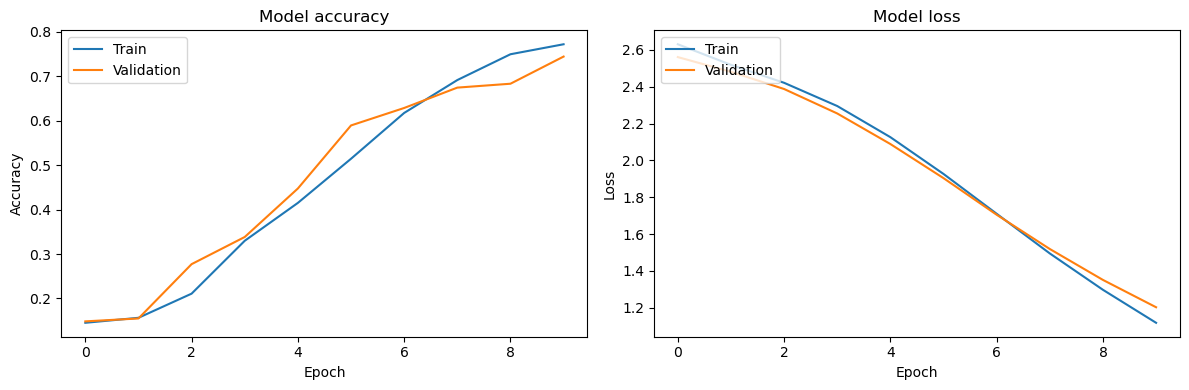

In [13]:
model = models.get_simple_NN(len(np.unique(labels)))


# Check the range of labels
num_classes = len(np.unique(labels))
if np.max(labels) >= num_classes:
    raise ValueError(f"Label values should be in the range [0, {num_classes-1}]")

X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.3, stratify=labels, random_state=42)

print(len(np.unique(y_val)))
print(len(np.unique(y_train)))

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))


# # Train the model
# model.fit(padded_sequences, labels, epochs=100, batch_size=16, validation_split=0.1)


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
training_vocab = tokenizer.word_index

len(training_vocab)

772

In order to predict labels for test data first we need to hadle oov words. There many methods can be used to handle this but obvious one is replacing oov with a special token like <UNK>. Let's do it

In [15]:

test_txt = cleaned_test_df['cleaned_text'].values

test_sequences = tokenizer.texts_to_sequences(test_txt)

# Pad the sequences
padded_test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=20, padding='post')

predictions = model.predict(padded_test_sequences)


predicted_classes = np.argmax(predictions, axis=1)

NN_test_labels = process_obj.label_decoder(predicted_classes)

NN_test_df = pd.DataFrame({
    'user_msg': test_txt,
    'label': NN_test_labels
})

NN_test_df.to_csv('./data/NN_unlablled_labeled.csv', index=False)



119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


Now we have model trained on labeled data. So, let's see if it works on the unlablled data or not.

In [16]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True, oov_token='<OOV>')
tokenizer.fit_on_texts(test_txt)
test_txt = tokenizer.texts_to_sequences(test_txt)

test_vocab = tokenizer.word_index

In [17]:
# Find common keys
common_keys = set(training_vocab.keys()) & set(test_vocab.keys())

# Find different keys
different_keys = set(training_vocab.keys()) ^ set(test_vocab.keys())

print(f"Number of common keys: {len(common_keys)}")
print(f"Number of different keys: {len(different_keys)}")

Number of common keys: 363
Number of different keys: 1904
